In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

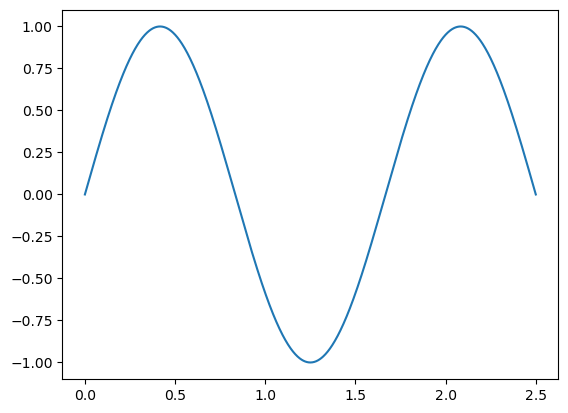

In [2]:
L = 2.5
n = 3
dt = 1e-3
num_passos_tempo = 10000 # com o dt determinado, passará dez segundos.

x = np.linspace(0, L, 1000)
dx = x[1] - x[0]


u_init = np.sin(n*np.pi*x / L) #t = 0

plt.plot(x, u_init)

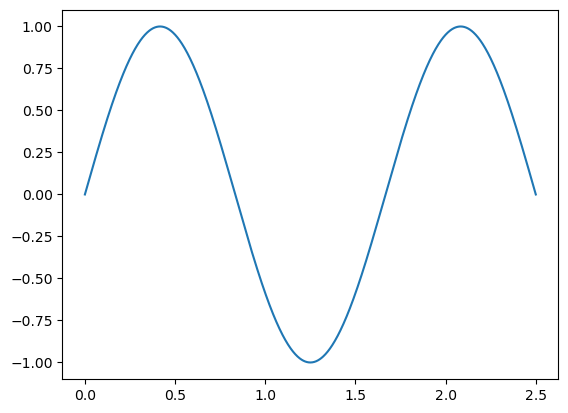

In [3]:
# agora fazendo uma matriz de u(x,t), onde u[n][j] em que n é o passo de tempo e j é a posição
u = np.zeros((len(x), num_passos_tempo + 1)).T # adiciona mais um passo de tempo para calcular u[n-1]

u[1] = np.array(u_init) # atenção que o u[1] é para o tempo t=0, e o u[0] é t = 0 -dt
u[0] = np.array(u_init) #repetindo o primeiro termo

plt.plot(x, u[0])

In [4]:
# v*dt = dx   #condição de contorno para mais estabilidade
v = dx / dt

u.shape

(10001, 1000)

In [5]:
from numba import jit


@jit(nopython=True)
def staggered_leapfrog(u: np.array, dt:float, dx:float, v: float=1.0)-> np.array:
  C = v*dt/dx

  for n in range(1, num_passos_tempo -1):
    for i in range(1, len(u[0])-1 ):
      u[n+1][i] = -u[n-1][i] + 2*u[n][i] + pow(C,2) * (u[n][i+1] - 2*u[n][i] + u[n][i-1])

  return u


In [6]:
u_leap = staggered_leapfrog(u, dt, dx, v)

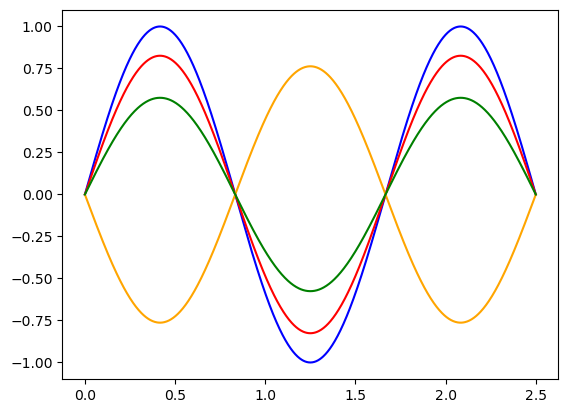

In [7]:
plt.plot(x, u_leap[1], color='blue')
plt.plot(x, u_leap[1269], color='red')
plt.plot(x, u_leap[5587], color='orange')
plt.plot(x, u_leap[8760], color='green')

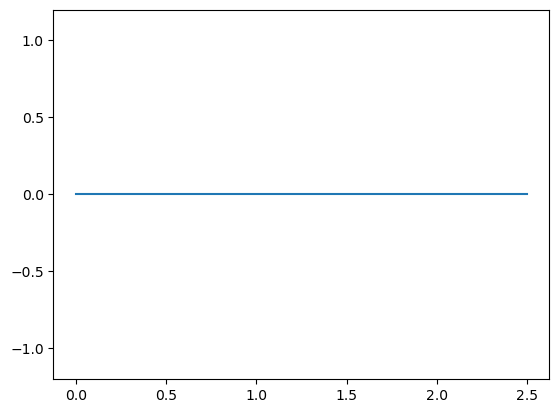

In [8]:
#ANIMAÇÃO
import matplotlib.animation as animation

# Função para atualizar o gráfico a cada quadro da animação
def update_plot(i, data, line):
    line.set_ydata(data[i])
    return line,

# Configuração inicial do gráfico
fig, ax = plt.subplots()
line, = ax.plot(x, u[0])
ax.set_ylim(-1.2, 1.2)

# Criação da animação
ani = animation.FuncAnimation(fig, update_plot, frames=len(u), fargs=(u, line), interval=40)

# Salvar a animação em um arquivo de vídeo
ani.save('animation.mp4', writer='ffmpeg')

# Mostrar o gráfico
plt.show()